# Avaliação Imobiliária

## 0. Índice
1. Imports e Configurações
2. Carregamento dos Dados da Amostra
3. Atribuição das Variáveis Independentes (X), Dependentes (y), número de observações (n) e variáveis (k)
4. Dados do Imóvel Avaliando
5. Análise Exploratória de Dados
6. Modelo de Regressão Linear Múltipla Não Regularizado com todas as variáveis
7. Remoção das Variável com Menor Significância e Novo Modelo Linear
8. Modelo de Regressão Linear Múltipla Regularizado (α proporcional ao P(t) de cada variável)
9. Comparação dos Modelos

### 1. Imports e Configurações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn')
%matplotlib inline
import locale
locale.setlocale(locale.LC_NUMERIC, "pt_BR.UTF-8");

### 2. Carregamento dos Dados da Amostra

In [2]:
df = pd.read_csv("../data/amostra.csv")

In [3]:
df.head()

,Endereço,Bairro,VT,Área,Vap,Quartos,Banheiros,Vagas,Alto PC,Baixo PC,Varanda,Fundos,Dependências,Condomínio,Pavimento,VU,Fonte,Imobiliária,Atualizado,Link
0,Rua Ererê,Cosme Velho,1000000,120,3771.38,3,3,3,0,1,1,1,1,1308,NaN,8333.333333,Zap,Kasanova,01/11/2021,https://www.zapimoveis.com.br/imovel/venda-apa...
1,Rua Filinto de Almeida,Cosme Velho,700000,113,3295.39,2,2,0,0,1,1,1,1,1044,1.0,6194.690265,Zap,OrlaRio,01/11/2021,https://www.zapimoveis.com.br/imovel/venda-apa...
2,"Praça São Judas Tadeu, 6",Cosme Velho,965000,129,3771.38,3,4,2,0,1,1,1,1,1640,NaN,7480.620155,Zap,João Correa,01/11/2021,https://www.zapimoveis.com.br/imovel/venda-apa...
3,"Rua Cosme Velho, 315",Cosme Velho,880000,87,3795.13,2,2,1,0,0,0,0,1,900,NaN,10114.942529,Zap,Calleri,NaN,https://www.zapimoveis.com.br/imovel/venda-apa...
4,Rua Marechal Pires Ferreira,Cosme Velho,1870000,152,3980.89,4,3,2,1,0,1,1,1,1826,NaN,12302.631579,Zap,Indik,NaN,https://www.zapimoveis.com.br/imovel/venda-apa...


### 3. Atribuição das Variáveis Independentes (X), Dependentes (y), número de observações (n) e variáveis (k)

In [4]:
X = df.iloc[:, 3:14]
X = sm.add_constant(X).dropna()

ind = X.index

y = (df.loc[ind, 'VT'] / df.loc[ind, 'Área']).rename("Valor Unitário")

n = np.size(X, 0)
k = np.size(X, 1) - 1

In [5]:
dados = pd.concat([X, y], axis=1).drop(columns="const")

### 4. Dados do Imóvel Avaliando

In [6]:
aval_list = np.reshape([1, 100, 3795.13, 3, 2, 2, 0, 0, 1, 1, 1, 1340], (1, 12))
aval = pd.DataFrame(aval_list, index=[0], columns=X.columns)
aval

,const,Área,Vap,Quartos,Banheiros,Vagas,Alto PC,Baixo PC,Varanda,Fundos,Dependências,Condomínio
0,1.0,100.0,3795.13,3.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1340.0


### 5. Análise Exploratória de Dados

In [7]:
X.describe()

,const,Área,Vap,Quartos,Banheiros,Vagas,Alto PC,Baixo PC,Varanda,Fundos,Dependências,Condomínio
count,40.0,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,1.0,106.475000,3742.265250,2.600000,2.22500,1.400000,0.250000,0.200000,0.600000,0.800000,0.700000,1170.45000
std,0.0,35.142922,194.970066,0.708918,0.76753,0.928191,0.438529,0.405096,0.496139,0.405096,0.464095,562.86433
min,1.0,57.000000,3295.390000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,402.00000
25%,1.0,80.750000,3771.380000,2.000000,2.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,875.00000
50%,1.0,97.500000,3795.130000,2.000000,2.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1072.00000
75%,1.0,124.000000,3795.130000,3.000000,3.00000,2.000000,0.250000,0.000000,1.000000,1.000000,1.000000,1432.00000
max,1.0,195.000000,3980.890000,4.000000,4.00000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3042.00000


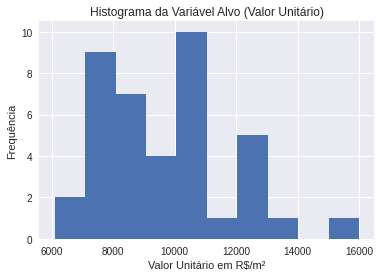

In [8]:
plt.hist(y);
plt.title("Histograma da Variável Alvo (Valor Unitário)");
plt.xlabel("Valor Unitário em R$/m²");
plt.ylabel("Frequência");

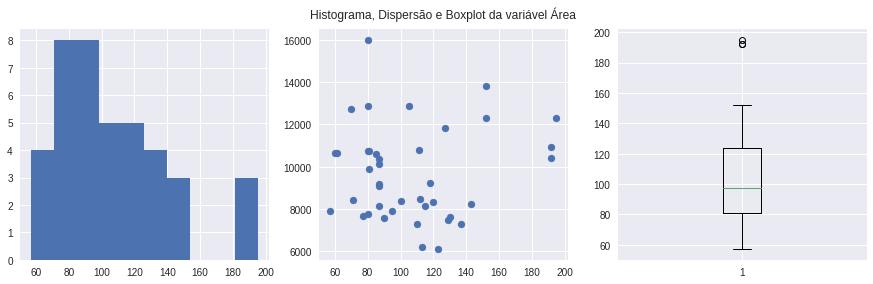

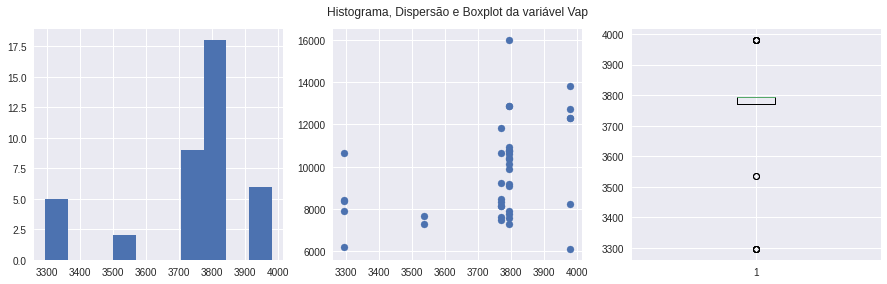

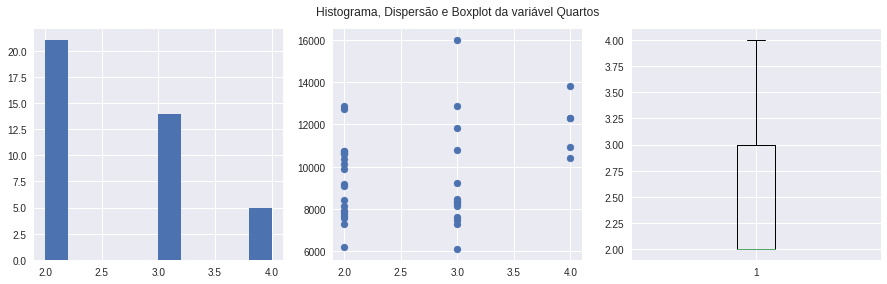

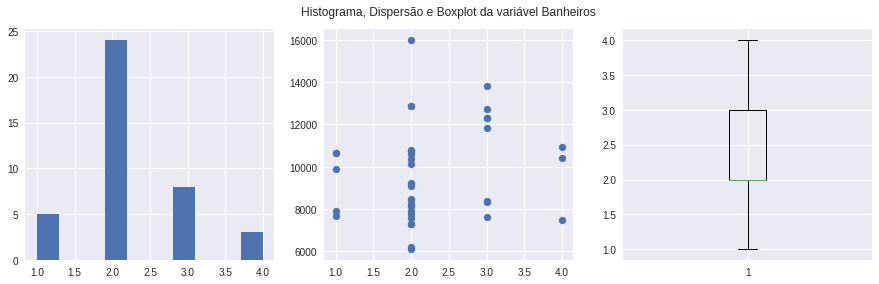

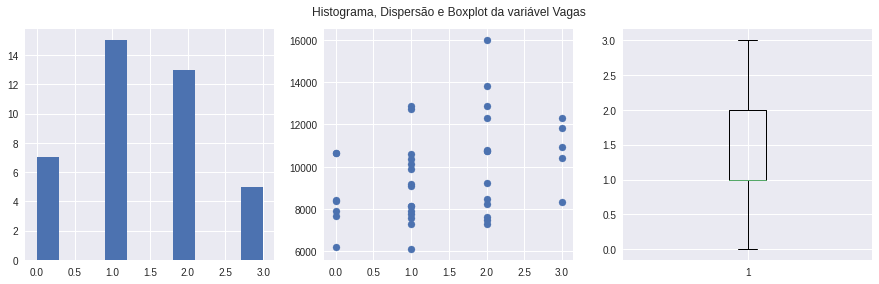

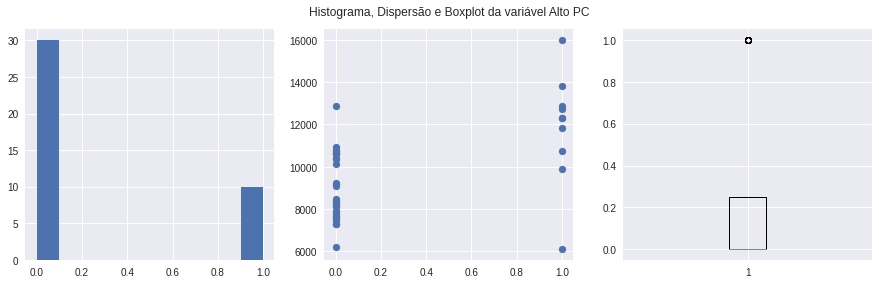

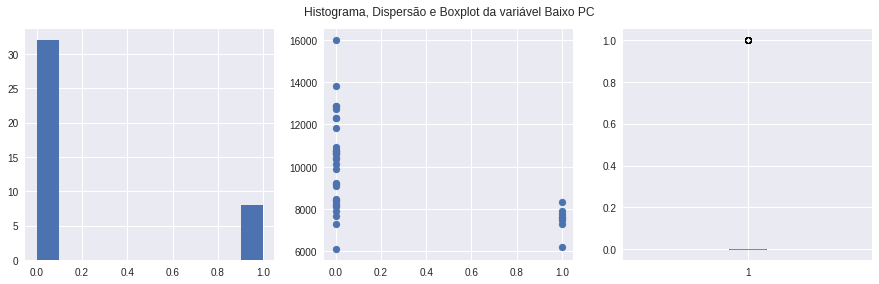

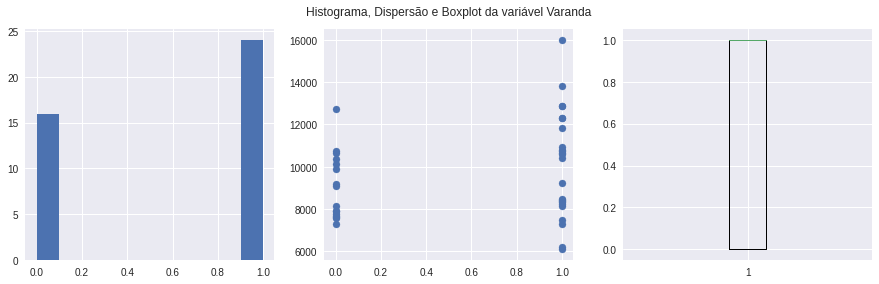

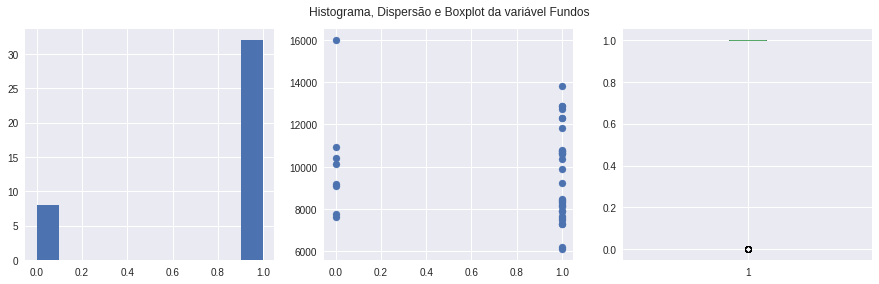

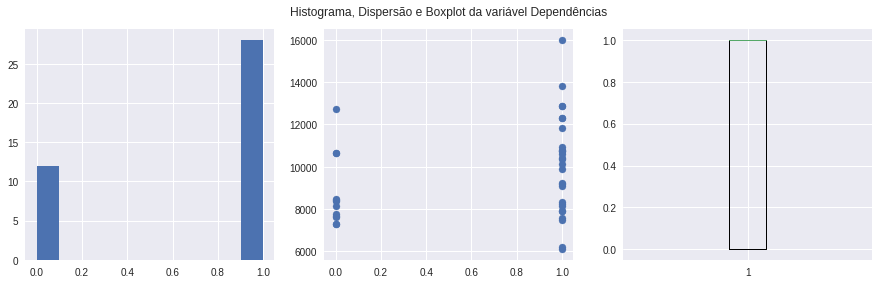

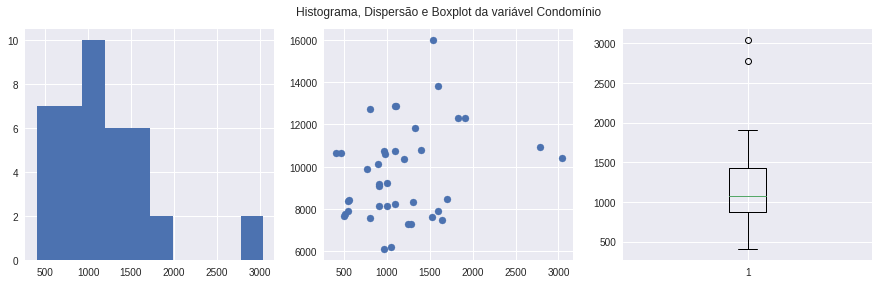

In [9]:
for i in range(k):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].hist(X[X.columns[i+1]])
    axs[1].scatter(X[X.columns[i+1]], y)
    axs[2].boxplot(X[X.columns[i+1]])
    
    fig.suptitle(f"Histograma, Dispersão e Boxplot da variável {X.columns[i+1]}")

    fig.subplots_adjust(left=.01, right=.99, bottom=.1, top=.9,
                        wspace=.2, hspace=.4)

#### Matriz de Correlação:

In [10]:
dados.corr()

,Área,Vap,Quartos,Banheiros,Vagas,Alto PC,Baixo PC,Varanda,Fundos,Dependências,Condomínio,Valor Unitário
Área,1.000000,0.375628,0.885734,0.739313,0.717209,0.168459,-0.041065,0.496474,-0.149852,0.243209,0.834706,0.066196
Vap,0.375628,1.000000,0.339578,0.322457,0.618526,0.429959,-0.210309,-0.053612,-0.129588,0.365774,0.397530,0.359944
Quartos,0.885734,0.339578,1.000000,0.688014,0.678034,0.329914,-0.160714,0.626953,-0.107143,0.171457,0.750176,0.295788
Banheiros,0.739313,0.322457,0.688014,1.000000,0.662248,0.133315,0.098961,0.377072,-0.263896,0.194355,0.745638,0.167560
Vagas,0.717209,0.618526,0.678034,0.662248,1.000000,0.314970,-0.013639,0.356348,-0.190941,0.404762,0.770430,0.354633
Alto PC,0.168459,0.429959,0.329914,0.133315,0.314970,1.000000,-0.288675,0.117851,0.144338,0.251976,0.115463,0.573402
Baixo PC,-0.041065,-0.210309,-0.160714,0.098961,-0.013639,-0.288675,1.000000,-0.229640,-0.062500,-0.081832,-0.082496,-0.493579
Varanda,0.496474,-0.053612,0.626953,0.377072,0.356348,0.117851,-0.229640,1.000000,0.229640,0.133631,0.389144,0.239133
Fundos,-0.149852,-0.129588,-0.107143,-0.263896,-0.190941,0.144338,-0.062500,0.229640,1.000000,-0.054554,-0.309968,-0.105658
Dependências,0.243209,0.365774,0.171457,0.194355,0.404762,0.251976,-0.081832,0.133631,-0.054554,1.000000,0.344082,0.274013


#### Matriz de Dispersão:

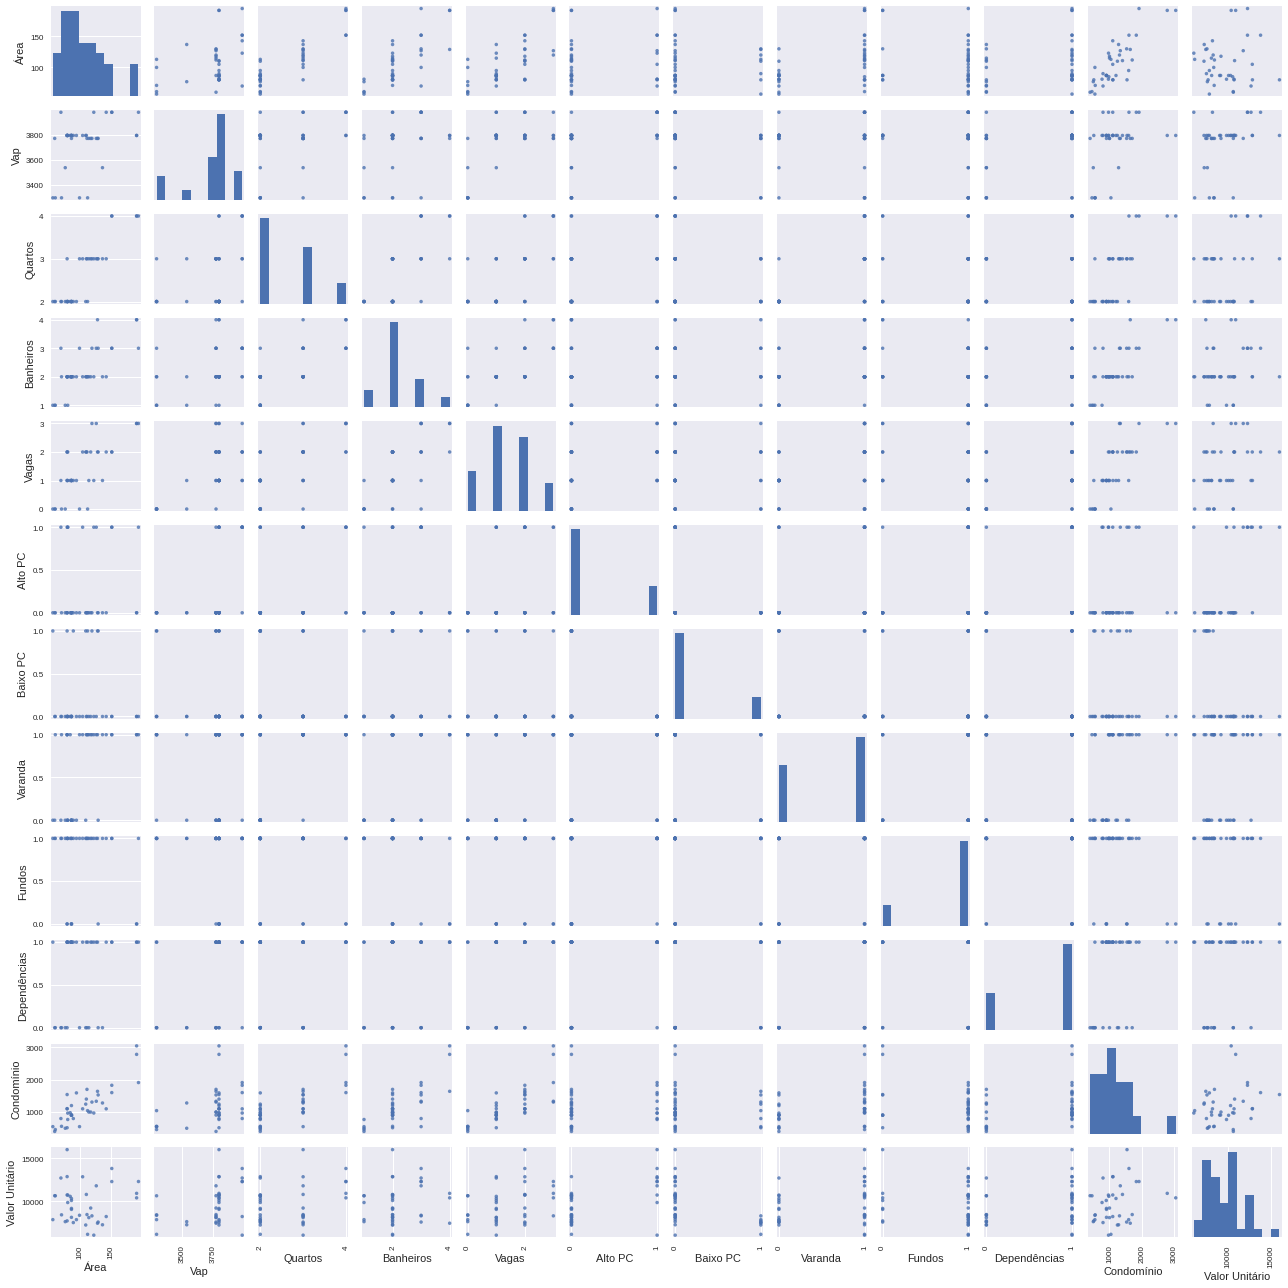

In [11]:
pd.plotting.scatter_matrix(dados, alpha=0.8, figsize=(18, 18));
plt.tight_layout()

#### Observações:
Pela análise gráfica dos histogramas, dispersões e boxplots das variáveis independentes, constata-se um importante grau de desbalanceamento dos dados da amostra, que em sua maioria não apresentam comportamento de distribuição normal em seus histogramas, não apresentam variância constante e normalidade de erros em suas dispersões com a variável dependente.

### 6. Modelo de Regressão Linear Múltipla Não Regularizado com todas as variáveis

#### Valor Unitário da população____________y = β0 + β1 . x1 + β2 . x2 + ... + βk . xk + ε
#### Valor Unitário da amostra______________ŷ = b0 + b1 . x1 + b2 . x2 + ... + bk . xk + e
#### Método dos mínimos quadrados________min Σe²

In [12]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Valor Unitário   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     5.585
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           0.000112
Time:                        23:13:00   Log-Likelihood:                -341.23
No. Observations:                  40   AIC:                             706.5
Df Residuals:                      28   BIC:                             726.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8159.5739   6894.359      1.184      0.247   -5962.881    2.23e+04
Área           -67.2940     18.823     -3.575      0.001    -105.850     -28.738
Vap              0.4746      1.899      0.250      0.805      -3.416       4.365
Quartos       1445.5949    956.240      1.512      0.142    -513.174    3404.364
Banheiros      238.2090    519.062      0.459      0.650    -825.041    1301.459
Vagas          525.2464    529.898      0.991      0.330    -560.201    1610.694
Alto PC       1821.5949    717.857      2.538      0.017     351.131    3292.059
Baixo PC     -1622.9112    708.091     -2.292      0.030   -3073.370    -172.453
Varanda        607.9504    782.704      0.777      0.444    -995.347    2211.247
Fundos        -704.2597    702.000     -1.003      0.324   -2142.241     733.722
Dependências   308.6252    602.470      0.512      0.612    -925.479    1542.730
Condomínio       1.4806      0.982      1.508      0.143      -0.531       3.492
==============================================================================
Omnibus:                       12.729   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.940
Skew:                          -0.797   Prob(JB):                     4.68e-05
Kurtosis:                       6.070   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
aval_VU = sum(results.params*aval.loc[0])
aval_VT = aval_VU * aval.loc[0, 'Área']
print("O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla não Regularizado\ncom todas as variáveis é de:\nR$", locale.format_string("%.2f", aval_VT, True))

O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla não Regularizado
com todas as variáveis é de:
R$ 1.129.140,39


#### P>|t| ou P(t) ou Distribuição t de Student
P(t) indica a probabilidade de, assumindo a hipótese nula (bi = 0), se tratar uma amostra extrema. Portando, tal métrica permite assumir a significância de uma variável explicativa para o modelo no Intervalo de Confiança de 1 - P(t).

### 7. Remoção das Variável com Menor Significância e Novo Modelo Linear

In [14]:
X.drop(columns=["Vap", "Banheiros", "Varanda", "Fundos", "Dependências"], inplace=True)
aval.drop(columns=["Vap", "Banheiros", "Varanda", "Fundos", "Dependências"], inplace=True)
k = np.size(X, 1) - 1

In [15]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Valor Unitário   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     10.91
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.11e-06
Time:                        23:13:00   Log-Likelihood:                -342.59
No. Observations:                  40   AIC:                             699.2
Df Residuals:                      33   BIC:                             711.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9293.4628    950.956      9.773      0.000    7358.728    1.12e+04
Área         -69.3888     17.207     -4.033      0.000    -104.397     -34.380
Quartos     1741.2516    752.641      2.314      0.027     209.992    3272.511
Vagas        695.3719    418.640      1.661      0.106    -156.358    1547.102
Alto PC     1720.5988    616.493      2.791      0.009     466.335    2974.863
Baixo PC   -1689.2336    599.272     -2.819      0.008   -2908.462    -470.005
Condomínio     1.8602      0.838      2.219      0.033       0.155       3.566
==============================================================================
Omnibus:                        7.778   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.819
Skew:                          -0.636   Prob(JB):                       0.0200
Kurtosis:                       4.753   Cond. No.                     6.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
aval_VU = sum(results.params*aval.loc[0])
aval_VT = aval_VU * aval.loc[0, "Área"]
print("O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla não Regularizado\ne apenas com variáveis significantes ao modelo (no IC de 89,4%) é de:\nR$", locale.format_string("%.2f", aval_VT, True))

O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla não Regularizado
e apenas com variáveis significantes ao modelo (no IC de 89,4%) é de:
R$ 1.146.177,03


### 8. Modelo de Regressão Linear Múltipla Regularizado (α proporcional ao P(t) de cada variável)

In [17]:
alpha = [0, 0, 10, 30, 0, 0, 10]

In [18]:
model = sm.OLS(y, X)

results_reg = model.fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1.0,
                                start_params=None, profile_scale=False, refit=False)
results_reg.params

const         8801.898697
Área           -38.899948
Quartos       1115.493518
Vagas          599.961575
Alto PC       1852.828842
Baixo PC     -1782.580705
Condomínio       0.992578
dtype: float64

In [19]:
aval_VU = np.dot(aval.loc[0], results_reg.params)
aval_VT = aval_VU * aval.loc[0, "Área"]
print("O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla Regularizado\npelo vetor α e apenas com variáveis significantes ao modelo (no IC de 89,4%) é de:\nR$", locale.format_string("%.2f", aval_VT, True))

O valor do imóvel estimado pelo Modelo de Regressão Linear Múltipla Regularizado
pelo vetor α e apenas com variáveis significantes ao modelo (no IC de 89,4%) é de:
R$ 1.078.836,24


In [20]:
SSE = np.sum((np.dot(X, results_reg.params) - y).pow(2))
SST = np.sum((np.mean(y) - y).pow(2))
R2 = 1 - SSE/SST
R2

0.6284833473929141

In [21]:
R2_Aj = 1 - (1 - R2)*((n - 1)/(n - k - 1))
R2_Aj

0.5609348651007167

### 9. Comparação dos Modelos

    1. OLS com todas as variáveis
        Av = R$ 1.129.140,39
        R² = 0,687
      R²aj = 0,564
    
    2. OLS com variáveis significantes (IC de 89,4%)
        Av = R$ 1.146.177,03
        R² = 0,665
      R²aj = 0,604

    3. OLS regularizado (vetor α) com variáveis significantes (IC de 89,4%)
        Av = R$ 1.078.836,24
        R² = 0,628
      R²aj = 0,561